# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [8]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [11]:
# Load the dataset
employee_data = pd.read_csv('Employee_data.csv')

In [12]:
# Check the first few entries
employee_data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [13]:
# Inspect the shape of the dataset
employee_data.shape

(74610, 24)

In [14]:
# Inspect the different columns in the dataset
employee_data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [16]:
# Check the summary of the dataset
employee_data.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [18]:
# Check the info to see the types of the feature variables and the null values present
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [22]:
# Check the number of missing values in each column
employee_data.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [24]:
# Check the percentage of missing values in each column
employee_data.isnull().sum()/len(employee_data)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            0.025627
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    0.032342
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [26]:
# Handle the missing value rows in the column
# As both missing percentages are very small, we're dropping the missing rows
employee_data.dropna(subset=["Distance from Home"], inplace=True)
employee_data.dropna(subset=["Company Tenure (In Months)"], inplace=True)

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [28]:
# Check the percentage of remaining data after missing values are removed
employee_data.isnull().sum()/len(employee_data)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64

In [29]:
#Checking duplicates data
employee_data.duplicated().sum()

77

In [30]:
#Drop duplicate rows
employee_data = employee_data.drop_duplicates(keep='last')

In [31]:
employee_data.shape

(70558, 24)

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [34]:
# Write a function to display the categorical columns with their unique values and check for redundant values
def categorical_columns(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"{col}: {unique_values}")

In [35]:
categorical_columns(employee_data)

Gender: ['Male' 'Female']
Job Role: ['Education' 'Media' 'Healthcare' 'Technology' 'Finance']
Work-Life Balance: ['Excellent' 'Poor' 'Good' 'Fair']
Job Satisfaction: ['Medium' 'High' 'Very High' 'Low']
Performance Rating: ['Average' 'Low' 'High' 'Below Average']
Overtime: ['No' 'Yes']
Education Level: ['Associate Degree' 'Masterâ€™s Degree' 'Bachelorâ€™s Degree'
 'High School' 'PhD']
Marital Status: ['Married' 'Divorced' 'Single']
Job Level: ['Mid' 'Senior' 'Entry']
Company Size: ['Medium' 'Small' 'Large']
Remote Work: ['No' 'Yes']
Leadership Opportunities: ['No' 'Yes']
Innovation Opportunities: ['No' 'Yes']
Company Reputation: ['Excellent' 'Fair' 'Poor' 'Good']
Employee Recognition: ['Medium' 'Low' 'High' 'Very High']
Attrition: ['Stayed' 'Left']


In [36]:
# Convert Yes/No columns to binary values
#employee_data['Overtime'] = employee_data['Overtime'].map({"Yes": 1, "No": 0})
#employee_data['Remote Work'] = employee_data['Remote Work'].map({"Yes": 1, "No": 0})
#employee_data['Leadership Opportunities'] = employee_data['Leadership Opportunities'].map({"Yes": 1, "No": 0})
#employee_data['Innovation Opportunities'] = employee_data['Innovation Opportunities'].map({"Yes": 1, "No": 0})
employee_data['Attrition'] = employee_data['Attrition'].map({"Left": 1, "Stayed": 0})

In [37]:
# Check the data
employee_data.head(10)

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,0
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,0
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,0
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,0
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,0
5,24368,38,Female,3,Technology,9977,Fair,High,Below Average,3,...,0,Mid,Medium,47.0,No,No,Yes,Fair,High,1
6,64970,47,Male,23,Education,3681,Fair,High,High,1,...,3,Entry,Small,93.0,No,No,No,Good,Medium,1
7,36999,48,Male,16,Finance,11223,Excellent,Very High,High,2,...,4,Entry,Medium,88.0,No,No,No,Excellent,Low,0
8,32714,57,Male,44,Education,3773,Good,Medium,High,1,...,4,Entry,Medium,75.0,No,No,No,Fair,Medium,0
406,40596,34,Male,13,Finance,9017,Fair,High,High,1,...,2,Mid,Large,86.0,No,No,No,Poor,Low,0


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [39]:
# Drop redundant columns which are not required for modelling
employee_data = employee_data.drop(columns=['Employee ID'])

In [40]:
# Check first few rows of data
employee_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2,No,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,0
1,59,Female,4,Media,5534,Poor,High,Low,3,No,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,0
2,24,Female,10,Healthcare,8159,Good,High,Low,0,No,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,0
3,36,Female,7,Education,3989,Good,High,High,1,No,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,0
4,56,Male,41,Education,4821,Fair,Very High,Average,0,Yes,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,0


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [43]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [45]:
# Put all the feature variables in X
X_columns = employee_data.drop(columns=['Attrition'])
# Put the target variable in y
Y_columns = employee_data['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [47]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X_columns,Y_columns,test_size=0.3, random_state=100)

In [48]:
X_train.shape

(49390, 22)

In [49]:
X_train.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
43289,47,Female,22,Healthcare,8168,Good,Medium,Average,0,Yes,...,Divorced,1,Senior,Large,33.0,Yes,No,No,Good,Medium
8229,48,Male,13,Media,5508,Fair,Very High,High,1,Yes,...,Married,1,Entry,Medium,69.0,No,No,No,Excellent,High
57161,59,Male,26,Healthcare,6959,Excellent,High,Average,0,No,...,Married,1,Entry,Medium,91.0,No,Yes,No,Fair,Low
55923,27,Female,19,Technology,6964,Fair,Medium,Low,2,Yes,...,Divorced,0,Mid,Large,82.0,No,No,Yes,Good,Low
14261,24,Male,6,Finance,6866,Fair,High,Average,2,No,...,Married,5,Mid,Medium,41.0,No,No,No,Good,Low


In [50]:
X_test.shape

(21168, 22)

In [51]:
y_train.shape

(49390,)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [56]:
# Select numerical columns
X_train.select_dtypes(include=np.number).head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
43289,47,22,8168,0,16.0,1,33.0
8229,48,13,5508,1,59.0,1,69.0
57161,59,26,6959,0,9.0,1,91.0
55923,27,19,6964,2,7.0,0,82.0
14261,24,6,6866,2,98.0,5,41.0


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

In [58]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

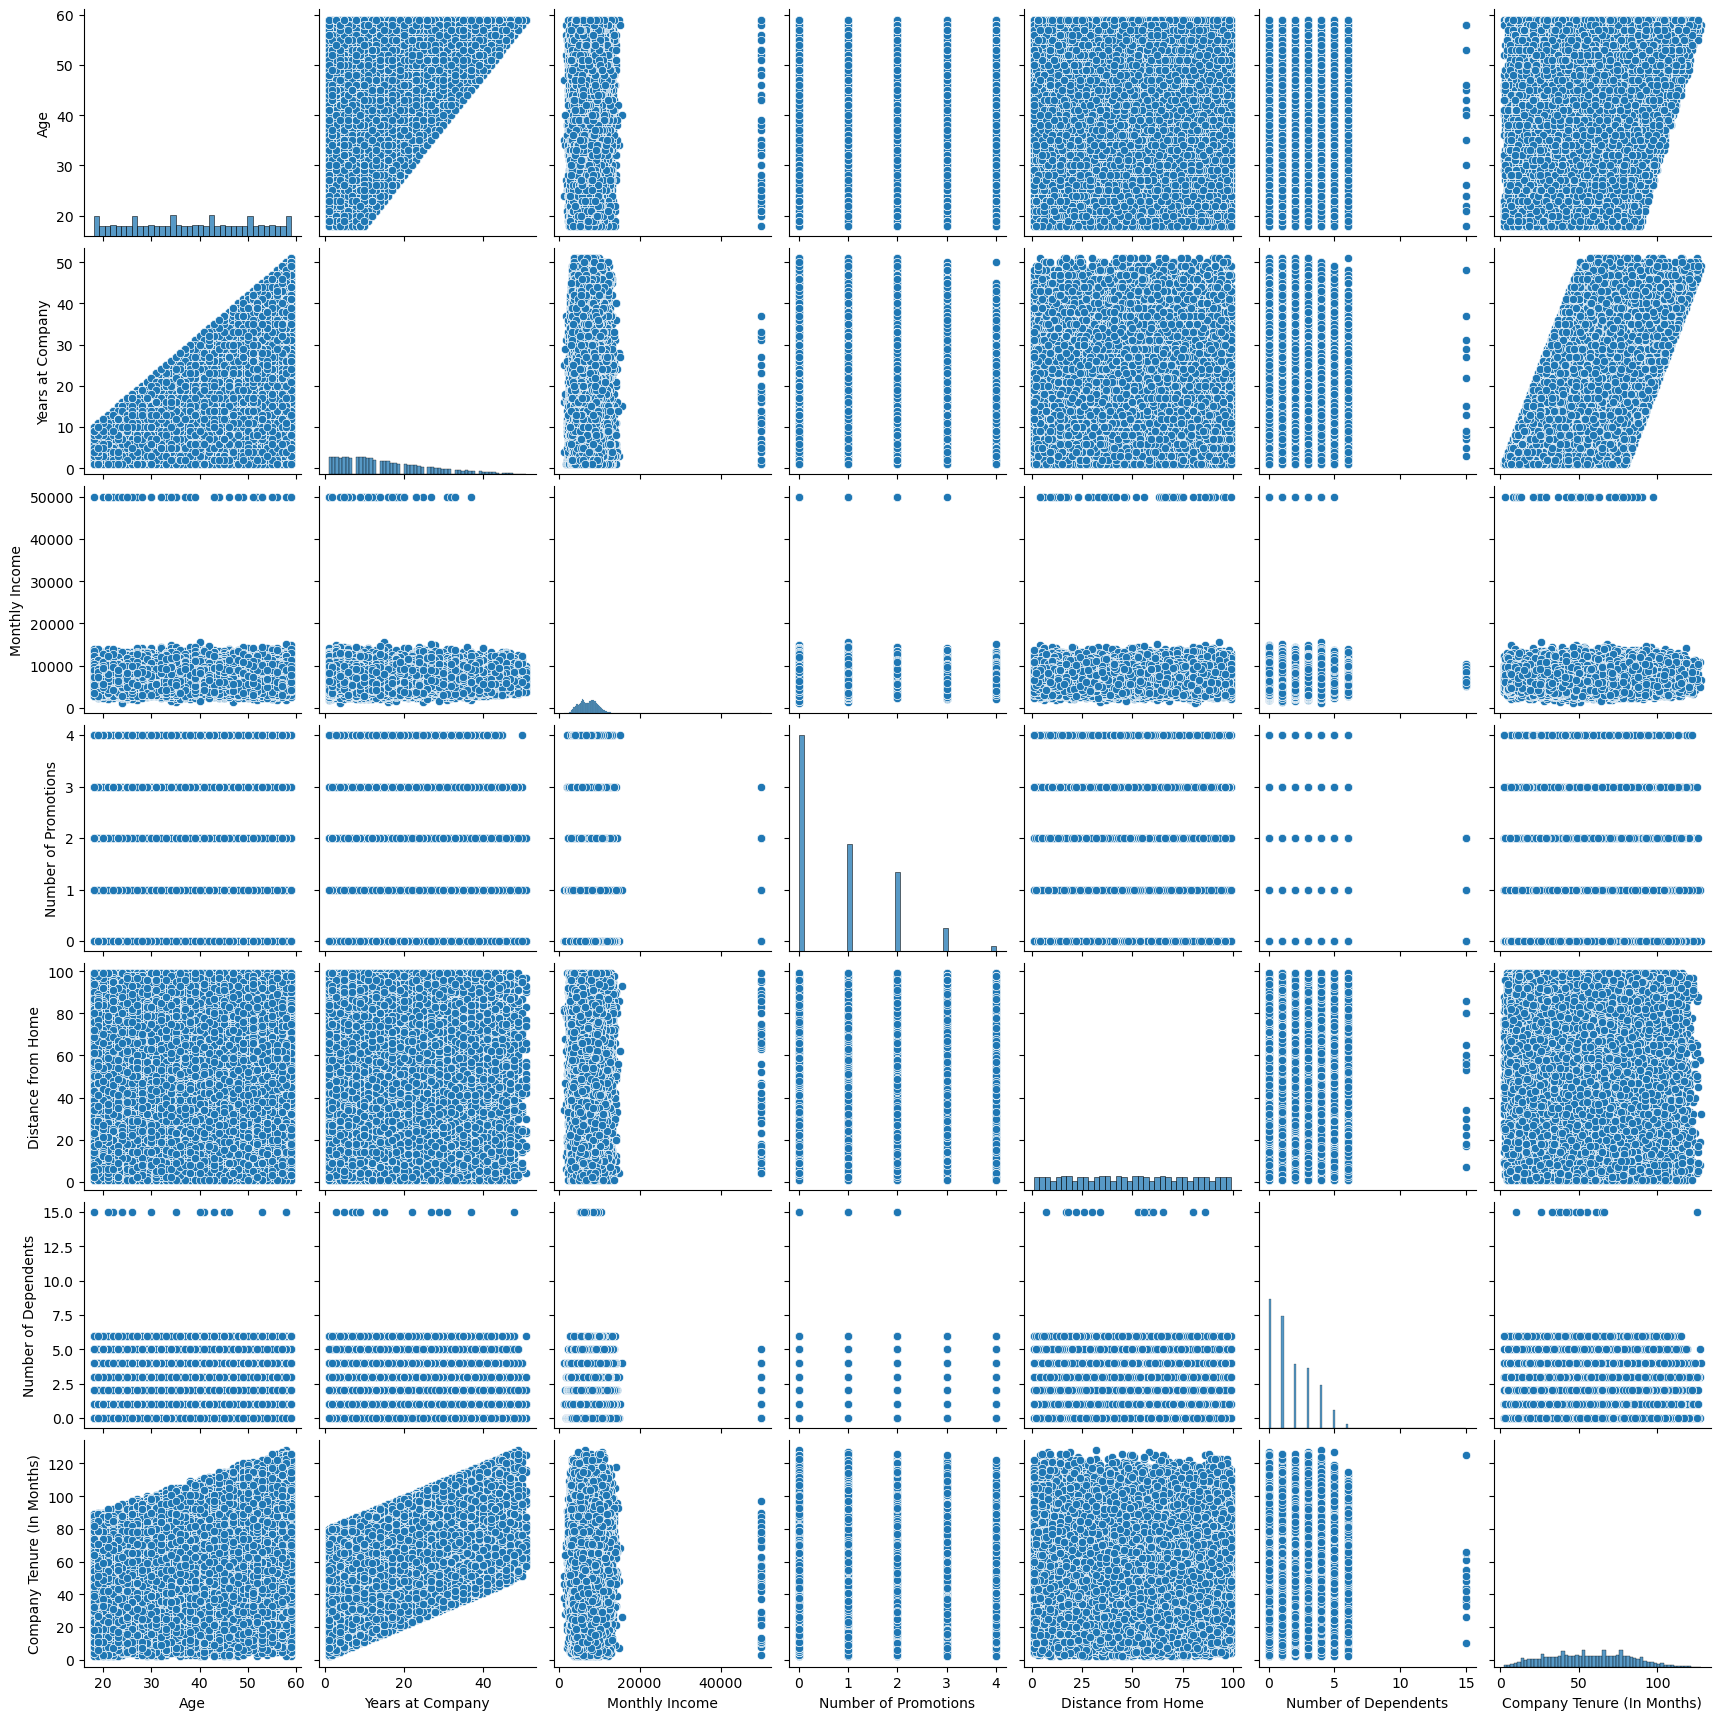

In [59]:
sns.pairplot(data=X_train,vars=['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home',
                                'Number of Dependents','Company Tenure (In Months)'])
plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [62]:
# Create correlation matrix for numerical columns
X_train.corr(numeric_only=True)

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
Age,1.000000,0.538064,-0.005292,0.000828,-0.005204,0.006750,0.240096
Years at Company,0.538064,1.000000,-0.012116,0.000451,-0.004660,0.005685,0.444088
Monthly Income,-0.005292,-0.012116,1.000000,-0.001297,-0.000221,0.000617,-0.010845
Number of Promotions,0.000828,0.000451,-0.001297,1.000000,-0.004633,-0.002965,0.006201
Distance from Home,-0.005204,-0.004660,-0.000221,-0.004633,1.000000,-0.000096,-0.004653
Number of Dependents,0.006750,0.005685,0.000617,-0.002965,-0.000096,1.000000,-0.001913
Company Tenure (In Months),0.240096,0.444088,-0.010845,0.006201,-0.004653,-0.001913,1.000000


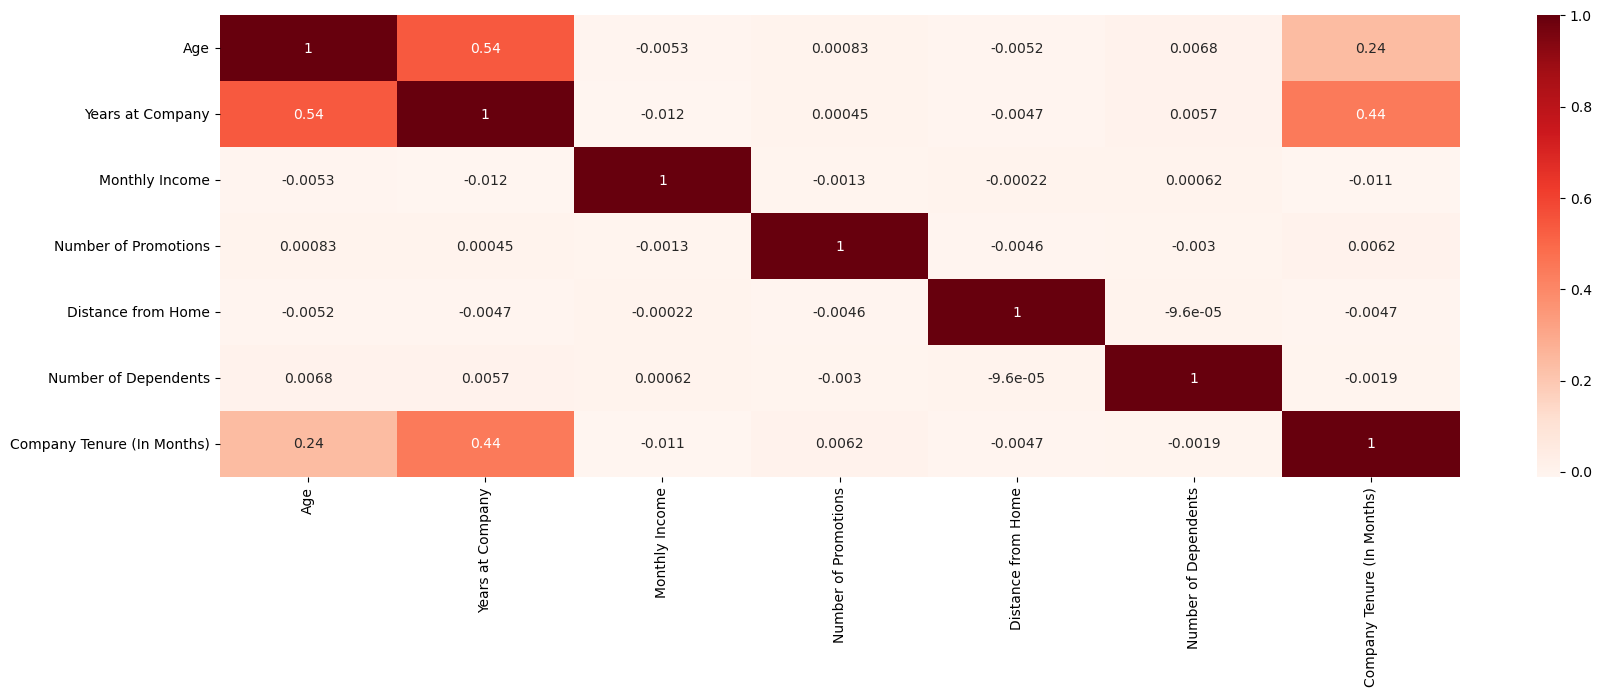

In [63]:
# Plot Heatmap of the correlation matrix
plt.figure(figsize=(20, 6))
sns.heatmap(X_train.corr(numeric_only=True), annot = True, cmap = 'Reds')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

In [66]:
# Plot a bar chart to check class balance
y_train.value_counts()

Attrition
0    25791
1    23599
Name: count, dtype: int64

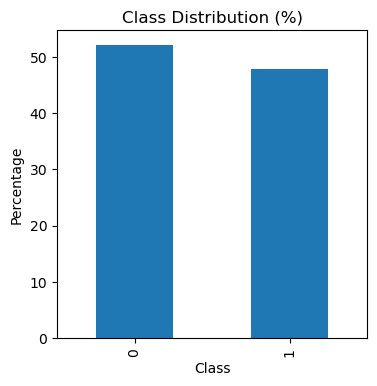

In [67]:
plt.figure(figsize=(4,4))
(y_train.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Class Distribution (%)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [70]:
# Plot distribution for each categorical column with target variable
# Will need to re-combine X_Train and Y_Train
train_data = pd.concat([X_train, y_train], axis=1)

In [71]:
train_data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
43289,47,Female,22,Healthcare,8168,Good,Medium,Average,0,Yes,...,1,Senior,Large,33.0,Yes,No,No,Good,Medium,0
8229,48,Male,13,Media,5508,Fair,Very High,High,1,Yes,...,1,Entry,Medium,69.0,No,No,No,Excellent,High,0
57161,59,Male,26,Healthcare,6959,Excellent,High,Average,0,No,...,1,Entry,Medium,91.0,No,Yes,No,Fair,Low,0
55923,27,Female,19,Technology,6964,Fair,Medium,Low,2,Yes,...,0,Mid,Large,82.0,No,No,Yes,Good,Low,1
14261,24,Male,6,Finance,6866,Fair,High,Average,2,No,...,5,Mid,Medium,41.0,No,No,No,Good,Low,0


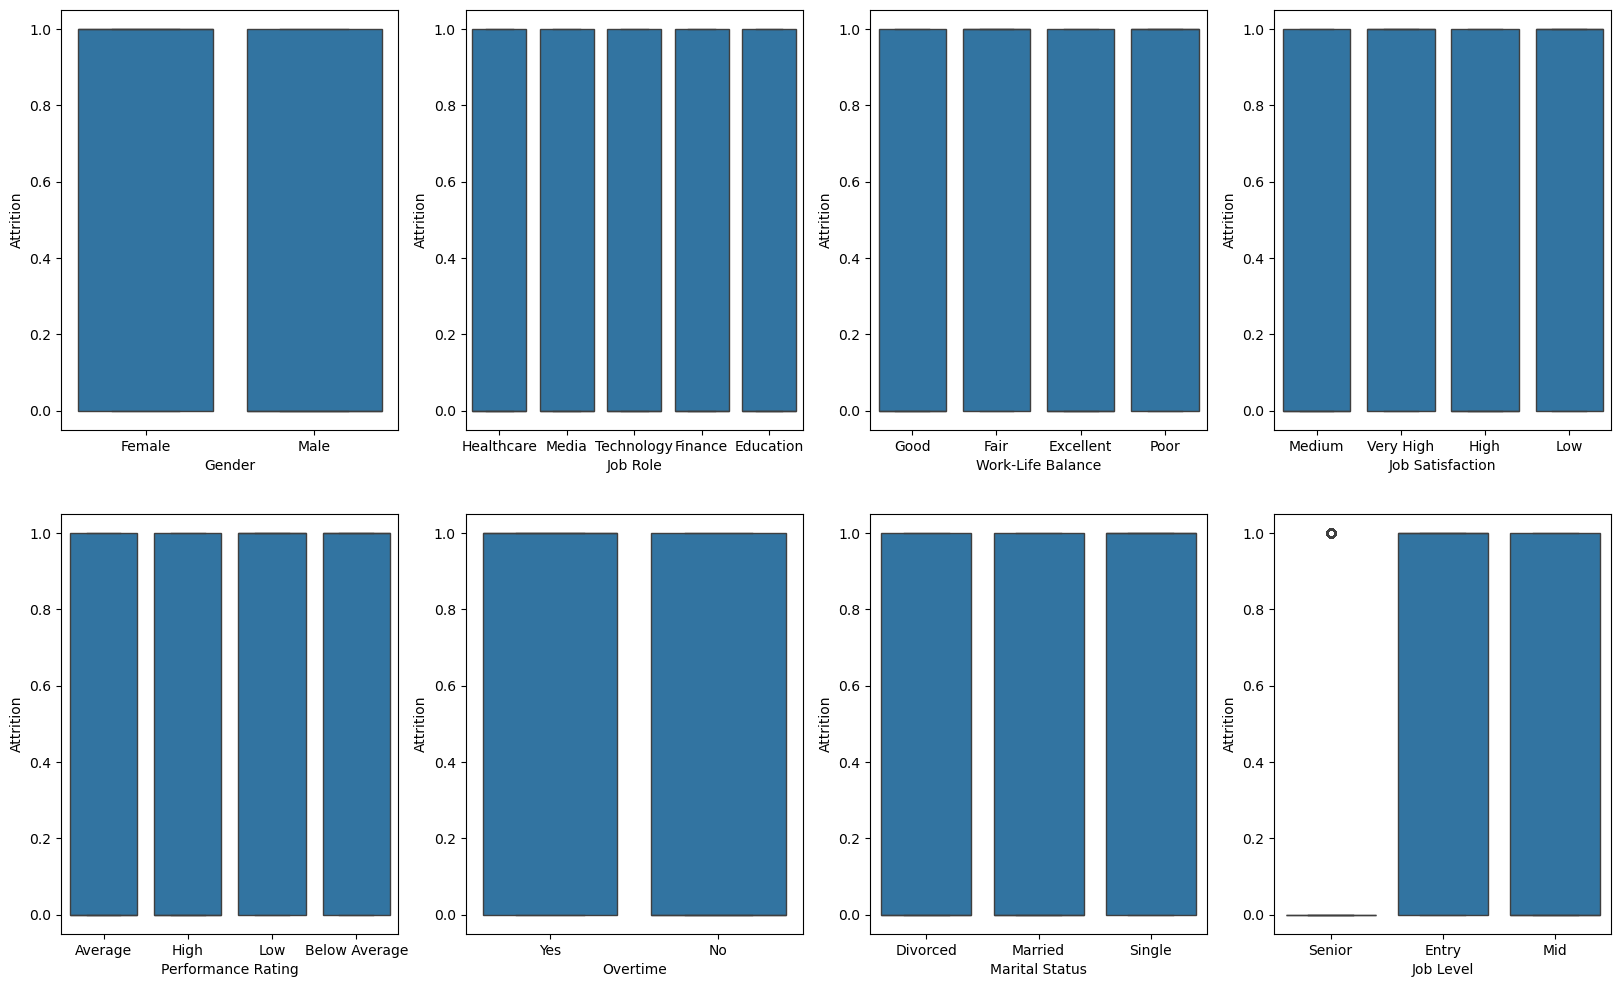

In [72]:
#Visualize the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='Gender', y='Attrition', data = train_data)
plt.subplot(2,4,2)
sns.boxplot(x='Job Role', y='Attrition', data = train_data)
plt.subplot(2,4,3)
sns.boxplot(x='Work-Life Balance', y='Attrition', data = train_data)
plt.subplot(2,4,4)
sns.boxplot(x='Job Satisfaction', y='Attrition', data = train_data)
plt.subplot(2,4,5)
sns.boxplot(x='Performance Rating', y='Attrition', data = train_data)
plt.subplot(2,4,6)
sns.boxplot(x='Overtime', y='Attrition', data = train_data)
plt.subplot(2,4,7)
sns.boxplot(x='Marital Status', y='Attrition', data = train_data)
plt.subplot(2,4,8)
sns.boxplot(x='Job Level', y='Attrition', data = train_data)
plt.show()

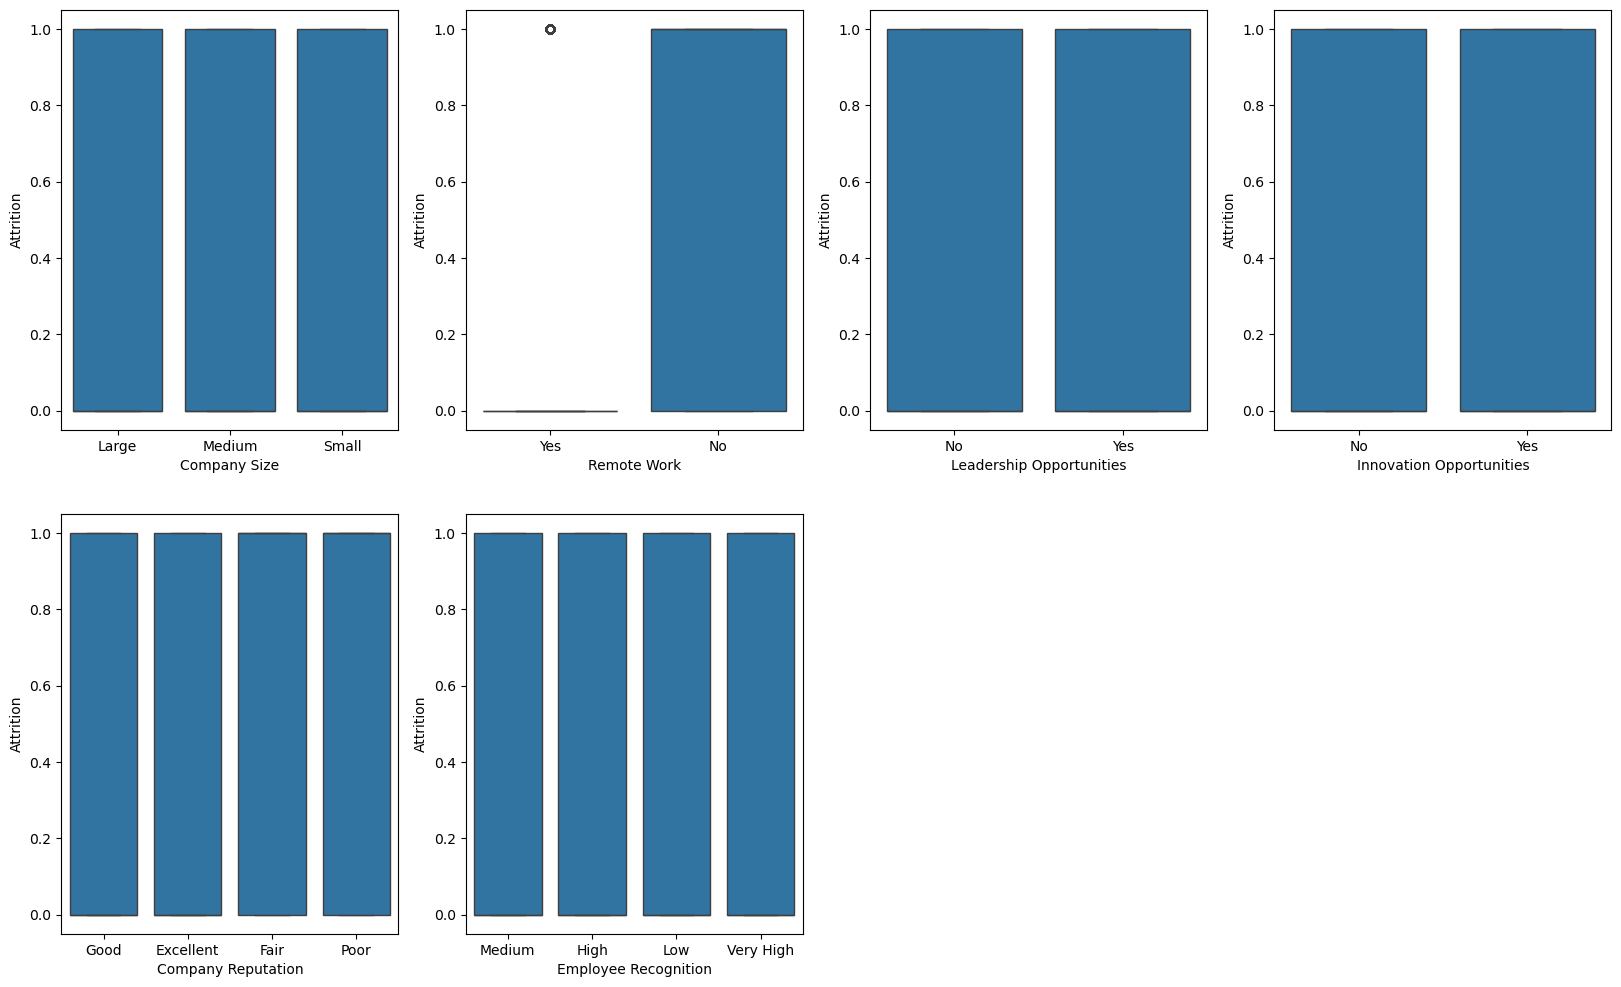

In [73]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='Company Size', y='Attrition', data = train_data)
plt.subplot(2,4,2)
sns.boxplot(x='Remote Work', y='Attrition', data = train_data)
plt.subplot(2,4,3)
sns.boxplot(x='Leadership Opportunities', y='Attrition', data = train_data)
plt.subplot(2,4,4)
sns.boxplot(x='Innovation Opportunities', y='Attrition', data = train_data)
plt.subplot(2,4,5)
sns.boxplot(x='Company Reputation', y='Attrition', data = train_data)
plt.subplot(2,4,6)
sns.boxplot(x='Employee Recognition', y='Attrition', data = train_data)
plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [78]:
# Select numerical columns


5.1.2 Plot distribution of numerical columns

In [80]:
# Plot all the numerical columns to understand their distribution


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

In [83]:
# Create correlation matrix for numerical columns

# Plot Heatmap of the correlation matrix


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [86]:
# Plot a bar chart to check class balance


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

In [89]:
# Plot distribution for each categorical column with target variable


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [93]:
# Check the categorical columns
X_train.select_dtypes(include=['object']).columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [95]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies = pd.get_dummies(X_train, columns=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'])

# Add the results to the master DataFrame
X_train = pd.concat([X_train, X_train_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [97]:
# Drop the original categorical columns and check the DataFrame
X_train = X_train.drop(columns=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],axis=1)

In [98]:
X_train.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Age,Years at Company,Monthly Income,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
43289,47,22,8168,0,16.0,1,33.0,47,22,8168,...,True,False,False,False,True,False,False,False,True,False
8229,48,13,5508,1,59.0,1,69.0,48,13,5508,...,True,False,True,False,False,False,True,False,False,False
57161,59,26,6959,0,9.0,1,91.0,59,26,6959,...,True,False,False,True,False,False,False,True,False,False
55923,27,19,6964,2,7.0,0,82.0,27,19,6964,...,False,True,False,False,True,False,False,True,False,False
14261,24,6,6866,2,98.0,5,41.0,24,6,6866,...,True,False,False,False,True,False,False,True,False,False


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [100]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies = pd.get_dummies(X_test, columns=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'])

# Add the results to the master DataFrame
X_test = pd.concat([X_test, X_test_dummies], axis=1)

Now, drop the original categorical columns and check the DataFrame

In [102]:
# Drop categorical columns and check the DataFrame
X_test = X_test.drop(columns=['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],axis=1)

In [103]:
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Age,Years at Company,Monthly Income,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
48051,46,23,5435,4,55.0,2,45.0,46,23,5435,...,True,False,False,False,False,True,False,False,True,False
57220,57,14,11391,2,99.0,3,52.0,57,14,11391,...,True,False,False,False,False,True,True,False,False,False
34940,58,25,6630,1,4.0,0,27.0,58,25,6630,...,False,True,False,False,False,True,False,False,True,False
13831,54,12,6087,0,34.0,1,28.0,54,12,6087,...,True,False,False,False,True,False,False,True,False,False
32814,34,17,10737,0,76.0,2,74.0,34,17,10737,...,True,False,False,False,False,True,False,False,False,True


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [105]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train, columns=['Attrition'])
y_test = pd.DataFrame(y_test, columns=['Attrition'])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [107]:
# Create dummy variables using the 'get_dummies' for dependent column
# This step is redundant as already converted Attrition to 0 and 1

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [109]:
# Create dummy variables using the 'get_dummies' for dependent column
# This step is redundant as already converted Attrition to 0 and 1

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [111]:
# Drop redundant columns from both train and validation
# This step is redundant as already converted Attrition to 0 and 1

In [112]:
y_train.head()

,Attrition
43289,0
8229,0
57161,0
55923,1
14261,0


In [113]:
y_test.head()

,Attrition
48051,0
57220,1
34940,0
13831,0
32814,0


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [116]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [118]:
# Scale the numeric features present in the training set
scaler = StandardScaler()

X_train[['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']] = scaler.fit_transform(X_train[['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']])
X_train.head()



,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Age,Years at Company,Monthly Income,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
43289,0.702264,0.554156,0.326824,-0.836512,-1.194836,-0.414764,-0.897020,0.702264,0.554156,0.326824,...,True,False,False,False,True,False,False,False,True,False
8229,0.785091,-0.247993,-0.722225,0.168727,0.316554,-0.414764,0.520452,0.785091,-0.247993,-0.722225,...,True,False,True,False,False,False,True,False,False,False
57161,1.696178,0.910666,-0.149981,-0.836512,-1.440876,-0.414764,1.386685,1.696178,0.910666,-0.149981,...,True,False,False,True,False,False,False,True,False,False
55923,-0.954258,0.286773,-0.148009,1.173966,-1.511174,-1.050240,1.032317,-0.954258,0.286773,-0.148009,...,False,True,False,False,True,False,False,True,False,False
14261,-1.202736,-0.871886,-0.186658,1.173966,1.687349,2.127139,-0.582027,-1.202736,-0.871886,-0.186658,...,True,False,False,False,True,False,False,True,False,False


In [119]:
# Scale the numerical features present in the validation set
X_test[['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']] = scaler.fit_transform(X_test[['Age','Years at Company','Monthly Income','Number of Promotions','Distance from Home','Number of Dependents',
         'Company Tenure (In Months)']])
X_test.head()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months),Age,Years at Company,Monthly Income,...,Innovation Opportunities_No,Innovation Opportunities_Yes,Company Reputation_Excellent,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_High,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
48051,0.615004,0.660528,-0.750431,3.187509,0.173929,0.217663,-0.417051,0.615004,0.660528,-0.750431,...,True,False,False,False,False,True,False,False,True,False
57220,1.523736,-0.140629,1.584795,1.175876,1.706992,0.851430,-0.141308,1.523736,-0.140629,1.584795,...,True,False,False,False,False,True,True,False,False,False
34940,1.606348,0.838563,-0.281896,0.170059,-1.603031,-1.049872,-1.126103,1.606348,0.838563,-0.281896,...,False,True,False,False,False,True,False,False,True,False
13831,1.275900,-0.318664,-0.494795,-0.835757,-0.557761,-0.416104,-1.086711,1.275900,-0.318664,-0.494795,...,True,False,False,False,True,False,False,True,False,False
32814,-0.376340,0.126423,1.328375,-0.835757,0.905618,0.217663,0.725311,-0.376340,0.126423,1.328375,...,True,False,False,False,False,True,False,False,False,True


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [123]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [125]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
estimator=LogisticRegression()
rfe = RFE(estimator, n_features_to_select=15)
#rfe = RFE(logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [126]:
# Display the features selected by RFE
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False, False])

In [127]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 41),
 ('Years at Company', False, 31),
 ('Monthly Income', False, 46),
 ('Number of Promotions', False, 28),
 ('Distance from Home', False, 25),
 ('Number of Dependents', False, 30),
 ('Company Tenure (In Months)', False, 45),
 ('Age', False, 33),
 ('Years at Company', False, 19),
 ('Monthly Income', False, 49),
 ('Number of Promotions', False, 14),
 ('Distance from Home', False, 11),
 ('Number of Dependents', False, 16),
 ('Company Tenure (In Months)', False, 42),
 ('Gender_Female', False, 13),
 ('Gender_Male', True, 1),
 ('Job Role_Education', False, 27),
 ('Job Role_Finance', False, 37),
 ('Job Role_Healthcare', False, 39),
 ('Job Role_Media', False, 40),
 ('Job Role_Technology', False, 38),
 ('Work-Life Balance_Excellent', True, 1),
 ('Work-Life Balance_Fair', True, 1),
 ('Work-Life Balance_Good', True, 1),
 ('Work-Life Balance_Poor', True, 1),
 ('Job Satisfaction_High', False, 17),
 ('Job Satisfaction_Low', True, 1),
 ('Job Satisfaction_Medium', False, 18),
 ('Job 

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [129]:
# Put columns selected by RFE into variable 'col'
col = X_train.columns[rfe.support_]

In [130]:
X_train.columns[~rfe.support_]

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)', 'Age', 'Years at Company',
       'Monthly Income', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Company Tenure (In Months)', 'Gender_Female',
       'Job Role_Education', 'Job Role_Finance', 'Job Role_Healthcare',
       'Job Role_Media', 'Job Role_Technology', 'Job Satisfaction_High',
       'Job Satisfaction_Medium', 'Performance Rating_Average',
       'Performance Rating_Below Average', 'Performance Rating_High',
       'Performance Rating_Low', 'Overtime_No', 'Overtime_Yes',
       'Education Level_Associate Degree',
       'Education Level_Bachelorâ€™s Degree', 'Education Level_High School',
       'Education Level_Masterâ€™s Degree', 'Marital Status_Divorced',
       'Marital Status_Married', 'Job Level_Mid', 'Company Size_Large',
       'Company Size_Medium', 'Company Size_Small',


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [133]:
# Select only the columns selected by RFE
col

Index(['Gender_Male', 'Work-Life Balance_Excellent', 'Work-Life Balance_Fair',
       'Work-Life Balance_Good', 'Work-Life Balance_Poor',
       'Job Satisfaction_Low', 'Job Satisfaction_Very High',
       'Education Level_PhD', 'Marital Status_Single', 'Job Level_Entry',
       'Job Level_Senior', 'Remote Work_No', 'Remote Work_Yes',
       'Company Reputation_Excellent', 'Company Reputation_Good'],
      dtype='object')

In [134]:
# View the training data
X_train[col]

,Gender_Male,Work-Life Balance_Excellent,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Education Level_PhD,Marital Status_Single,Job Level_Entry,Job Level_Senior,Remote Work_No,Remote Work_Yes,Company Reputation_Excellent,Company Reputation_Good
43289,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True
8229,True,False,True,False,False,False,True,False,False,True,False,True,False,True,False
57161,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False
55923,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
14261,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15975,False,False,False,True,False,False,False,True,False,False,True,True,False,False,True
66996,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
69241,False,False,False,True,False,False,True,False,False,False,True,True,False,False,True
59523,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [136]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [138]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                49390
Model:                            GLM   Df Residuals:                    49376
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25220.
Date:                Mon, 26 May 2025   Deviance:                       50440.
Time:                        01:54:46   Pearson chi2:                 4.66e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3045
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.3985      0.017    -23.848      0.000      -0.431      -0.366
Gender_Male                     -0.5820      0.022    -26.356      0.000      -0.625      -0.539
Work-Life Balance_Excellent     -0.8236      0.023    -36.017      0.000      -0.868      -0.779
Work-Life Balance_Fair           0.4203      0.018     22.726      0.000       0.384       0.457
Work-Life Balance_Good          -0.5587      0.017    -31.966      0.000      -0.593      -0.524
Work-Life Balance_Poor           0.5634      0.025     22.686      0.000       0.515       0.612
Job Satisfaction_Low             0.4583      0.037     12.368      0.000       0.386       0.531
Job Satisfaction_Very High       0.4566      0.028     16.555      0.000       0.403       0.511
Education Level_PhD             -1.5559      0.055    -28.093      0.000      -1.664      -1.447
Marital Status_Single            1.7076      0.025     69.648      0.000       1.660       1.756
Job Level_Entry                  0.9552      0.024     39.679      0.000       0.908       1.002
Job Level_Senior                -1.5157      0.033    -45.952      0.000      -1.580      -1.451
Remote Work_No                   0.6571      0.015     44.703      0.000       0.628       0.686
Remote Work_Yes                 -1.0556      0.021    -50.748      0.000      -1.096      -1.015
Company Reputation_Excellent    -0.5959      0.039    -15.323      0.000      -0.672      -0.520
Company Reputation_Good         -0.6286      0.023    -26.970      0.000      -0.674      -0.583
================================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [141]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Work-Life Balance_Excellent,inf
2,Work-Life Balance_Fair,inf
3,Work-Life Balance_Good,inf
4,Work-Life Balance_Poor,inf
11,Remote Work_No,inf
12,Remote Work_Yes,inf
9,Job Level_Entry,1.20
10,Job Level_Senior,1.20
13,Company Reputation_Excellent,1.12
14,Company Reputation_Good,1.12


In [353]:
#Drop first column with inf VIF
col = col.drop('Work-Life Balance_Excellent', 1)
col

Index(['Gender_Male', 'Work-Life Balance_Fair', 'Work-Life Balance_Good',
       'Work-Life Balance_Poor', 'Job Satisfaction_Low',
       'Job Satisfaction_Very High', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Entry', 'Job Level_Senior',
       'Remote Work_No', 'Remote Work_Yes', 'Company Reputation_Excellent',
       'Company Reputation_Good'],
      dtype='object')

In [355]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                49390
Model:                            GLM   Df Residuals:                    49376
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25220.
Date:                Mon, 26 May 2025   Deviance:                       50440.
Time:                        02:05:18   Pearson chi2:                 4.66e+04
No. Iterations:                   100   Pseudo R-squ. (CS):             0.3045
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.9476      0.025    -37.390      0.000      -0.997      -0.898
Gender_Male                     -0.5820      0.022    -26.352      0.000      -0.625      -0.539
Work-Life Balance_Fair           1.2439      0.033     37.452      0.000       1.179       1.309
Work-Life Balance_Good           0.2649      0.031      8.410      0.000       0.203       0.327
Work-Life Balance_Poor           1.3870      0.040     34.810      0.000       1.309       1.465
Job Satisfaction_Low             0.4583      0.037     12.365      0.000       0.386       0.531
Job Satisfaction_Very High       0.4567      0.028     16.554      0.000       0.403       0.511
Education Level_PhD             -1.5560      0.055    -28.095      0.000      -1.664      -1.447
Marital Status_Single            1.7077      0.025     69.630      0.000       1.660       1.756
Job Level_Entry                  0.9552      0.024     39.670      0.000       0.908       1.002
Job Level_Senior                -1.5158      0.033    -45.970      0.000      -1.580      -1.451
Remote Work_No                   0.3826      0.016     23.303      0.000       0.350       0.415
Remote Work_Yes                 -1.3302      0.024    -56.232      0.000      -1.377      -1.284
Company Reputation_Excellent    -0.5960      0.039    -15.321      0.000      -0.672      -0.520
Company Reputation_Good         -0.6286      0.023    -26.965      0.000      -0.674      -0.583
================================================================================================
"""

In [357]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Work-Life Balance_Good,1.93
1,Work-Life Balance_Fair,1.88
3,Work-Life Balance_Poor,1.53
8,Job Level_Entry,1.20
9,Job Level_Senior,1.20
12,Company Reputation_Excellent,1.12
13,Company Reputation_Good,1.12
4,Job Satisfaction_Low,1.03
5,Job Satisfaction_Very High,1.03
0,Gender_Male,1.00


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [359]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm.astype(float)).values.reshape(-1)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [361]:
# Reshape it into an array
y_train_pred[:10]

array([0.01540924, 0.71358012, 0.45219498, 0.51257663, 0.37012589,
       0.96144898, 0.73444587, 0.21598265, 0.58623754, 0.75275577])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [363]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
y_train_pred_final = pd.DataFrame({'Attrition':y_train['Attrition'], 'Attrition_Prob':y_train_pred})
y_train_pred_final.head()

,Attrition,Attrition_Prob
43289,0,0.015409
8229,0,0.713580
57161,0,0.452195
55923,1,0.512577
14261,0,0.370126


In [364]:
y_train.head()

,Attrition
43289,0
8229,0
57161,0
55923,1
14261,0


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [366]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [367]:
y_train_pred_final.head()

,Attrition,Attrition_Prob,Predicted
43289,0,0.015409,0
8229,0,0.713580,1
57161,0,0.452195,0
55923,1,0.512577,1
14261,0,0.370126,0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [370]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.Predicted))

0.7365661064992913


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [372]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.Predicted )
print(confusion)

[[18996  6795]
 [ 6216 17383]]


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [374]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [376]:
# Calculate sensitivity
TP / float(TP+FN)

0.7365990084325607

In [377]:
# Calculate specificity
TN / float(TN+FP)

0.7365360009305572

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [379]:
# Calculate precision
TP / float(TP+FP)

0.71895938456448

In [380]:
# Calculate recall
TP / float(TP+FN)

0.7365990084325607

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [383]:
# Define ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [384]:
# Call the ROC function
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob, drop_intermediate = False )

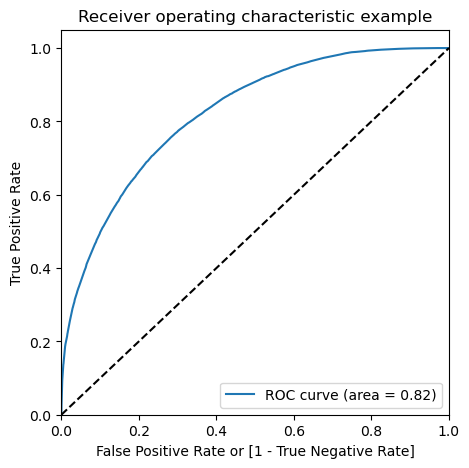

In [385]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [388]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
43289,0,0.015409,0,1,0,0,0,0,0,0,0,0,0
8229,0,0.713580,1,1,1,1,1,1,1,1,1,0,0
57161,0,0.452195,0,1,1,1,1,1,0,0,0,0,0
55923,1,0.512577,1,1,1,1,1,1,1,0,0,0,0
14261,0,0.370126,0,1,1,1,1,0,0,0,0,0,0


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [390]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.477809  1.000000  0.000000
0.1   0.1  0.584450  0.992669  0.210926
0.2   0.2  0.659708  0.953812  0.390601
0.3   0.3  0.704495  0.891351  0.533519
0.4   0.4  0.727981  0.812365  0.650770
0.5   0.5  0.736566  0.736599  0.736536
0.6   0.6  0.730006  0.617696  0.832771
0.7   0.7  0.702207  0.475656  0.909503
0.8   0.8  0.657238  0.323573  0.962545
0.9   0.9  0.586475  0.140599  0.994455


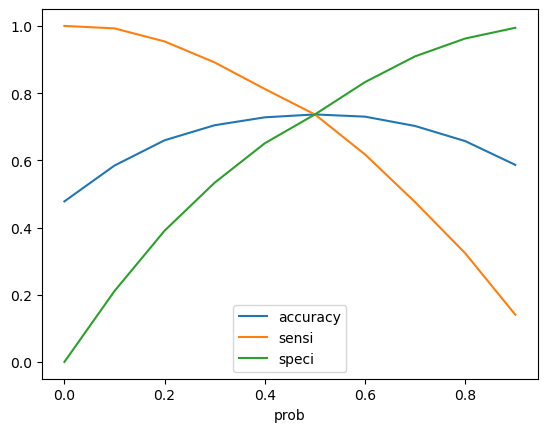

In [391]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [392]:
#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [394]:
# Create a column for final prediction based on the optimal cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map( lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Attrition,Attrition_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
43289,0,0.015409,0,1,0,0,0,0,0,0,0,0,0,0
8229,0,0.713580,1,1,1,1,1,1,1,1,1,0,0,1
57161,0,0.452195,0,1,1,1,1,1,0,0,0,0,0,0
55923,1,0.512577,1,1,1,1,1,1,1,0,0,0,0,1
14261,0,0.370126,0,1,1,1,1,0,0,0,0,0,0,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [396]:
# Calculate the accuracy
metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)

0.7365661064992913

7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [398]:
# Create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted )
confusion2

array([[18996,  6795],
       [ 6216, 17383]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [400]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [402]:
# Calculate Sensitivity
TP / float(TP+FN)

0.7365990084325607

In [403]:
# Calculate Specificity
TN / float(TN+FP)

0.7365360009305572

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [405]:
# Calculate Precision
TP / float(TP+FP)

0.71895938456448

In [406]:
# Calculate Recall
TP / float(TP+FN)

0.7365990084325607

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [408]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [409]:
# Check actual and predicted values from initial model
y_train_pred_final.Attrition, y_train_pred_final.Predicted

(43289    0
 8229     0
 57161    0
 55923    1
 14261    0
         ..
 15975    0
 66996    0
 69241    1
 59523    1
 40994    0
 Name: Attrition, Length: 49390, dtype: int64,
 43289    0
 8229     1
 57161    0
 55923    1
 14261    0
         ..
 15975    0
 66996    0
 69241    0
 59523    0
 40994    0
 Name: Predicted, Length: 49390, dtype: int64)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

In [411]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

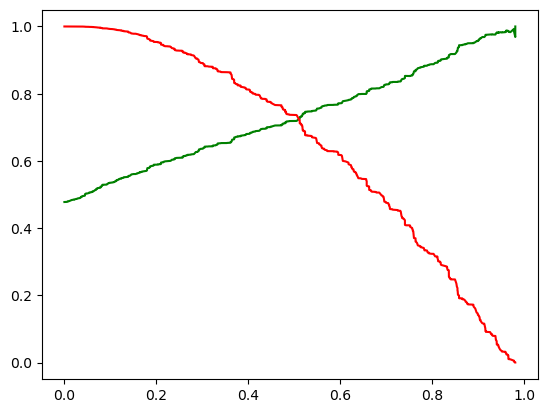

In [412]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [416]:
# Select the relevant features for validation set
X_test = X_test[col]
X_test.head()

,Gender_Male,Work-Life Balance_Fair,Work-Life Balance_Good,Work-Life Balance_Poor,Job Satisfaction_Low,Job Satisfaction_Very High,Education Level_PhD,Marital Status_Single,Job Level_Entry,Job Level_Senior,Remote Work_No,Remote Work_Yes,Company Reputation_Excellent,Company Reputation_Good
48051,True,True,False,False,True,False,False,False,False,True,True,False,False,False
57220,True,False,False,True,True,False,False,True,False,False,True,False,False,False
34940,True,False,True,False,False,True,False,True,False,True,True,False,False,False
13831,True,False,False,False,False,False,False,False,True,False,True,False,False,True
32814,True,False,True,False,False,True,False,True,False,True,False,True,False,False


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [418]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [420]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_test_sm.astype(float))
# View predictions
y_validation_pred[:10]

48051    0.276767
57220    0.917277
34940    0.441874
13831    0.305677
32814    0.124954
45562    0.913543
12977    0.896956
27327    0.539052
33152    0.082934
50934    0.559707
dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [422]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(y_validation_pred)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(y_test)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([actual, predicted_probability],axis=1)

In [423]:
y_pred_final.head()

,Attrition,0
0,0,0.276767
1,1,0.917277
2,0,0.441874
3,0,0.305677
4,0,0.124954


In [424]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})

In [425]:
y_pred_final.head()

,Attrition,Attrition_Prob
0,0,0.276767
1,1,0.917277
2,0,0.441874
3,0,0.305677
4,0,0.124954


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [427]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
# Check the DataFrame
y_pred_final.head()

,Attrition,Attrition_Prob,final_predicted
0,0,0.276767,0
1,1,0.917277,1
2,0,0.441874,0
3,0,0.305677,0
4,0,0.124954,0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [429]:
# Calculate the overall accuracy
metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted)

0.7364890400604687

### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [431]:
# Create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted )
confusion2

array([[8080, 2900],
       [2678, 7510]], dtype=int64)

In [432]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [434]:
# Calculate sensitivity
TP / float(TP+FN)

0.7371417353749509

In [435]:
# Calculate specificity
TN / float(TN+FP)

0.7358834244080146

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [437]:
# Calculate precision
TP / float(TP+FP)

0.7214217098943324

In [438]:
# Calculate recall
TP / float(TP+FN)

0.7371417353749509

## Conclusion



In [ ]:
### Variables with +ve impact on Attrition: 
Work-Life Balance_Good
Remote Work_No
Job Satisfaction_Very High
Job Satisfaction_Low
Job Level_Entry
Work-Life Balance_Fair
Work-Life Balance_Poor
Marital Status_Single

### Variables with -ve impact on Attrition
Education Level_PhD
Job Level_Senior
Remote Work_Yes
Company Reputation_Good
Company Reputation_Excellent
Gender_Male